## IMPORTING ALL LIBRARIES

In [127]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error as mse
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR




## IMPORTING DATASET

In [128]:
data=pd.read_csv(r"C:\Users\Dell\Downloads\forest_fires.csv")
print(data)

         area  X  Y  month  day    DMC     DC   ISI  temp  RH  wind
0    0.000000  7  5      7    0   26.2   94.3   5.1   8.2  51   6.7
1    0.000000  7  4     10    5   35.4  669.1   6.7  18.0  33   0.9
2    0.000000  7  4     10    2   43.7  686.9   6.7  14.6  33   1.3
3    0.000000  8  6      7    0   33.3   77.5   9.0   8.3  97   4.0
4    0.000000  8  6      7    3   51.3  102.2   9.6  11.4  99   1.8
..        ... .. ..    ...  ...    ...    ...   ...   ...  ..   ...
512  2.006871  4  3      1    3   56.7  665.6   1.9  27.8  32   2.7
513  4.012592  2  4      1    3   56.7  665.6   1.9  21.9  71   5.8
514  2.498152  7  4      1    3   56.7  665.6   1.9  21.2  70   6.7
515  0.000000  1  4      1    2  146.0  614.7  11.3  25.6  42   4.0
516  0.000000  6  3      9    5    3.0  106.7   1.1  11.8  31   4.5

[517 rows x 11 columns]


## BASIC INFORMATIONS

In [129]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   area    517 non-null    float64
 1   X       517 non-null    int64  
 2   Y       517 non-null    int64  
 3   month   517 non-null    int64  
 4   day     517 non-null    int64  
 5   DMC     517 non-null    float64
 6   DC      517 non-null    float64
 7   ISI     517 non-null    float64
 8   temp    517 non-null    float64
 9   RH      517 non-null    int64  
 10  wind    517 non-null    float64
dtypes: float64(6), int64(5)
memory usage: 44.6 KB


## DATA CLEANING

### CHECKING EMPTY CELLS

In [130]:
data.isna().sum()

area     0
X        0
Y        0
month    0
day      0
DMC      0
DC       0
ISI      0
temp     0
RH       0
wind     0
dtype: int64

In [131]:
print(data.columns)

Index(['area', 'X', 'Y', 'month', 'day', 'DMC', 'DC', 'ISI', 'temp', 'RH',
       'wind'],
      dtype='object')


### CHECKING DUPLICATES

In [132]:
print('Number of duplicated rows:',len(data[data.duplicated]))

Number of duplicated rows: 4


In [133]:
print(data.describe())

             area           X           Y       month         day         DMC  \
count  517.000000  517.000000  517.000000  517.000000  517.000000  517.000000   
mean     1.111026    4.669246    4.299807    5.758221    2.736944  110.872340   
std      1.398436    2.313778    1.229900    4.373275    1.925061   64.046482   
min      0.000000    1.000000    2.000000    0.000000    0.000000    1.100000   
25%      0.000000    3.000000    4.000000    1.000000    1.000000   68.600000   
50%      0.418710    4.000000    4.000000    6.000000    3.000000  108.300000   
75%      2.024193    7.000000    5.000000   11.000000    4.000000  142.400000   
max      6.995620    9.000000    9.000000   11.000000    6.000000  291.300000   

               DC         ISI        temp          RH        wind  
count  517.000000  517.000000  517.000000  517.000000  517.000000  
mean   547.940039    9.021663   18.889168   44.288201    4.017602  
std    248.066192    4.559477    5.806625   16.317469    1.791653 

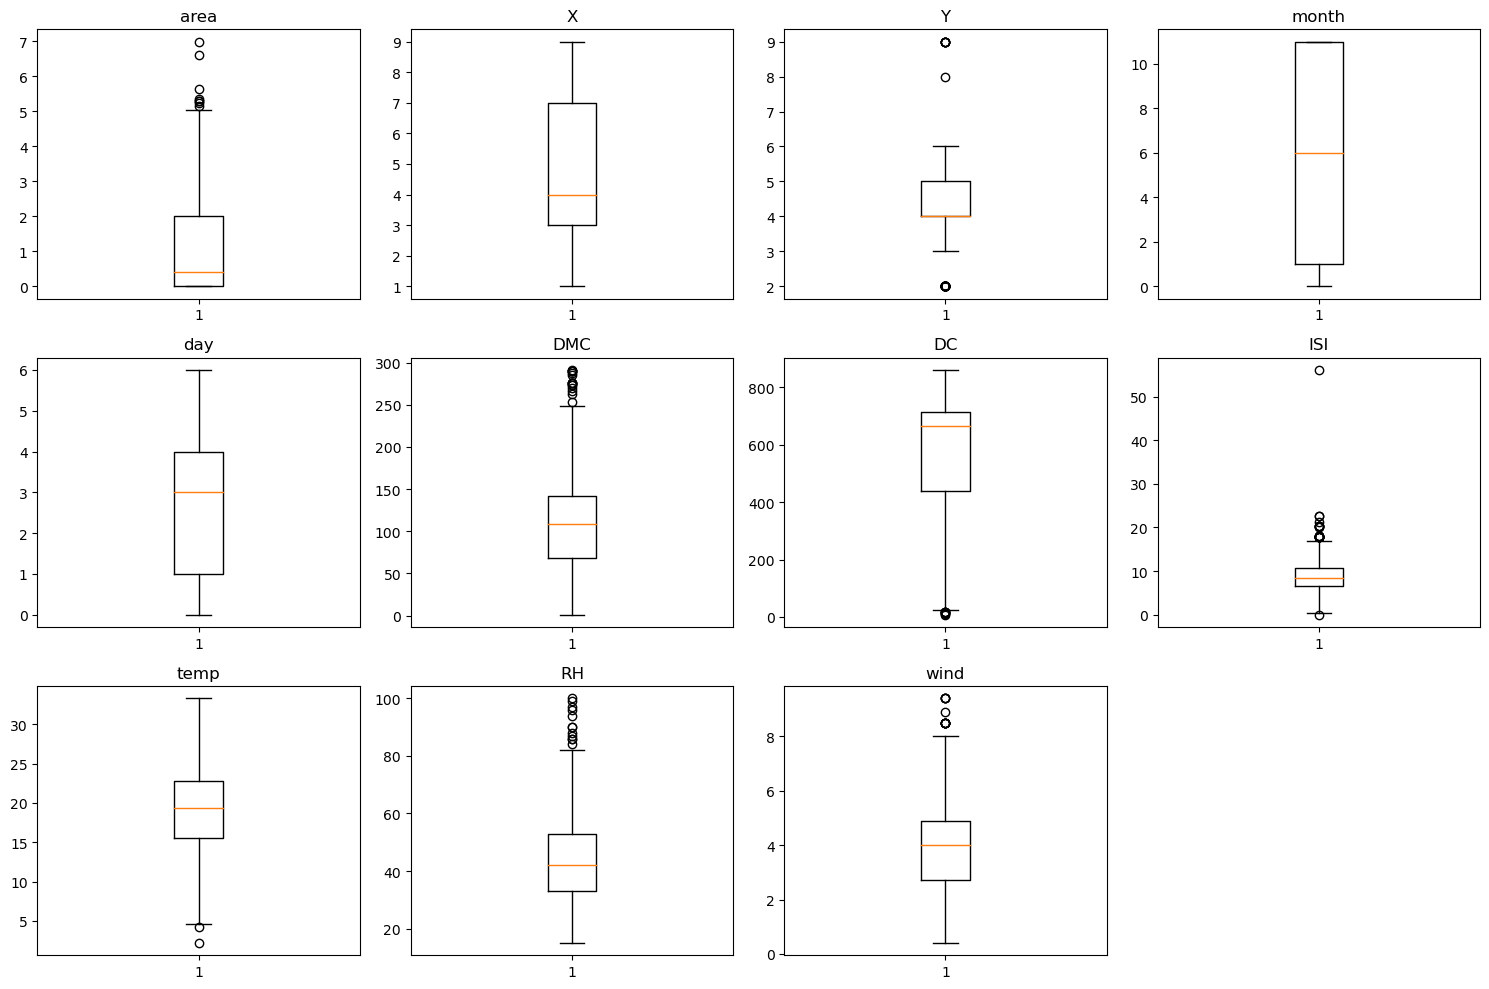

In [134]:
plt.figure(figsize=(15, 10))
for i, column in enumerate(data.columns):
    plt.subplot(3, 4, i+1)
    plt.boxplot(data[column])
    plt.title(column)
plt.tight_layout()
plt.show()


### REMOVING OUTLIERS

In [135]:
# Function to remove outliers using the Quartile Method (IQR)
def remove_outliers_iqr(data, columns):
    for column in columns:
        Q1 = data[column].quantile(0.25)  # 25th percentile
        Q3 = data[column].quantile(0.75)  # 75th percentile
        IQR = Q3 - Q1  # Interquartile Range
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Filter out the rows outside the bounds
        data = data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]
    return data

# Remove outliers from both columns A and B

data = remove_outliers_iqr(data, ['area', 'Y', 'DMC', 'DC', 'ISI', 'temp', 'RH','wind'])




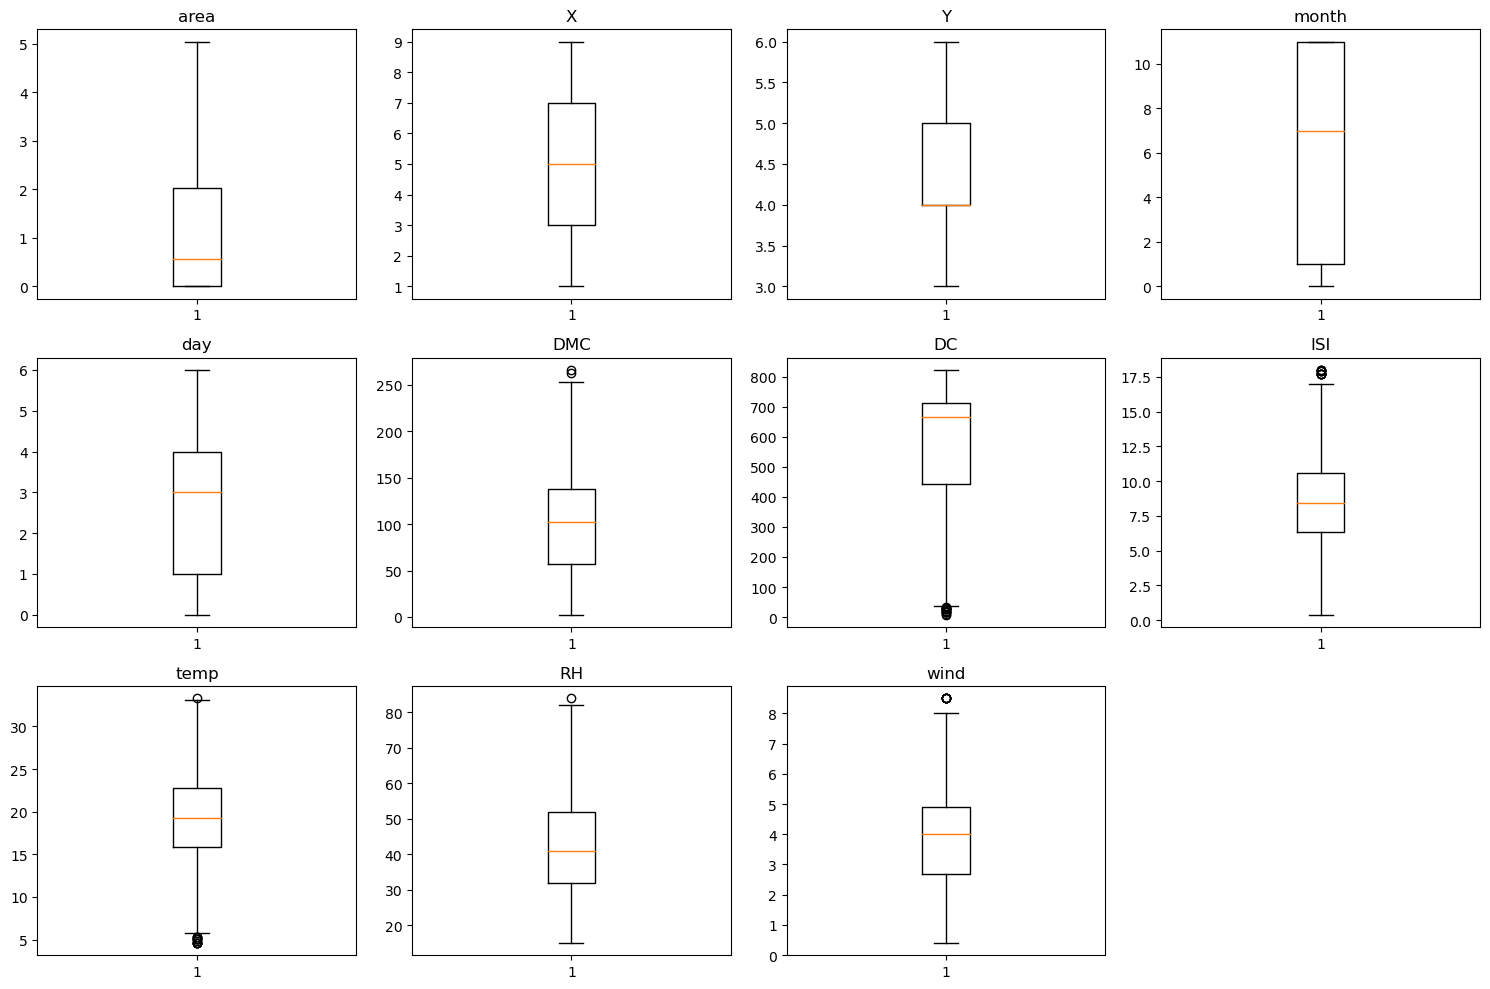

In [136]:
plt.figure(figsize=(15, 10))
for i, column in enumerate(data.columns):
    plt.subplot(3, 4, i+1)
    plt.boxplot(data[column])
    plt.title(column)
plt.tight_layout()
plt.show()

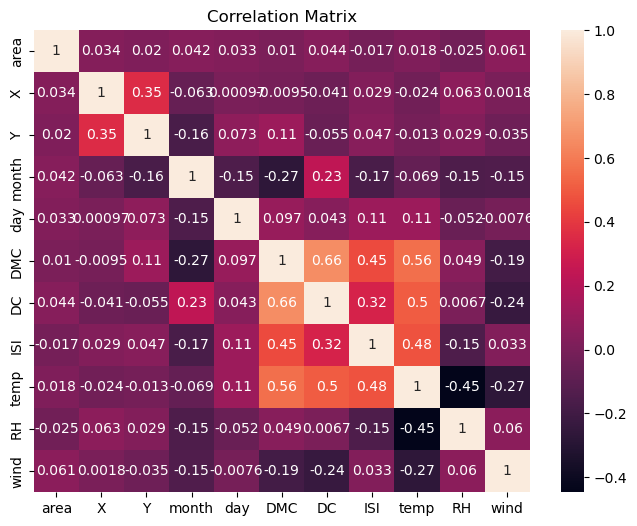

In [137]:
plt.figure(figsize=(8, 6))
sns.heatmap(data.corr(), annot=True)
plt.title('Correlation Matrix')
plt.show()

In [138]:
# Split the data into features (X) and target (y)
X = data.drop('area', axis=1)
y = data['area']


In [139]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [140]:
# Scale the data using StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [141]:
# Build and evaluate Linear Regression model
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
print(f'Linear Regression MSE: {mse(y_test, y_pred_lr):.2f}')


Linear Regression MSE: 1.63


In [142]:
# Build and evaluate Decision Tree Regressor model
dtr = DecisionTreeRegressor(max_depth=5)
dtr.fit(X_train, y_train)
y_pred_dtr = dtr.predict(X_test)
print(f'Decision Tree Regressor MSE: {mse(y_test, y_pred_dtr):.2f}')


Decision Tree Regressor MSE: 1.61


In [143]:
# Build and evaluate Random Forest Regressor model
rfr = RandomForestRegressor(n_estimators=100, max_depth=5, random_state=42)
rfr.fit(X_train, y_train)
y_pred_rfr = rfr.predict(X_test)
print(f'Random Forest Regressor MSE: {mse(y_test, y_pred_rfr):.2f}')


Random Forest Regressor MSE: 1.50


In [144]:
# Build and evaluate Support Vector Regressor model
svr = SVR(kernel='rbf', C=1e3, gamma=0.1)
svr.fit(X_train, y_train)
y_pred_svr = svr.predict(X_test)
print(f'Support Vector Regressor MSE: {mse(y_test, y_pred_svr):.2f}')


Support Vector Regressor MSE: 3.14


##### We can conclude thatRandom Forest Regressor performs the best, with the lowest MSE of 1.50. Decision Tree Regressor and Linear Regression perform similarly, with MSE values close to each other (1.61 and 1.63, respectively).Support Vector Regressor performs the worst, with the highest MSE of 3.14.These results suggest that the Random Forest Regressor model is the most accurate in predicting the area of forest fires based on the given features.